# <center> **Kaggle’s Spaceship Titanic Competition**
# <center> **Overview**

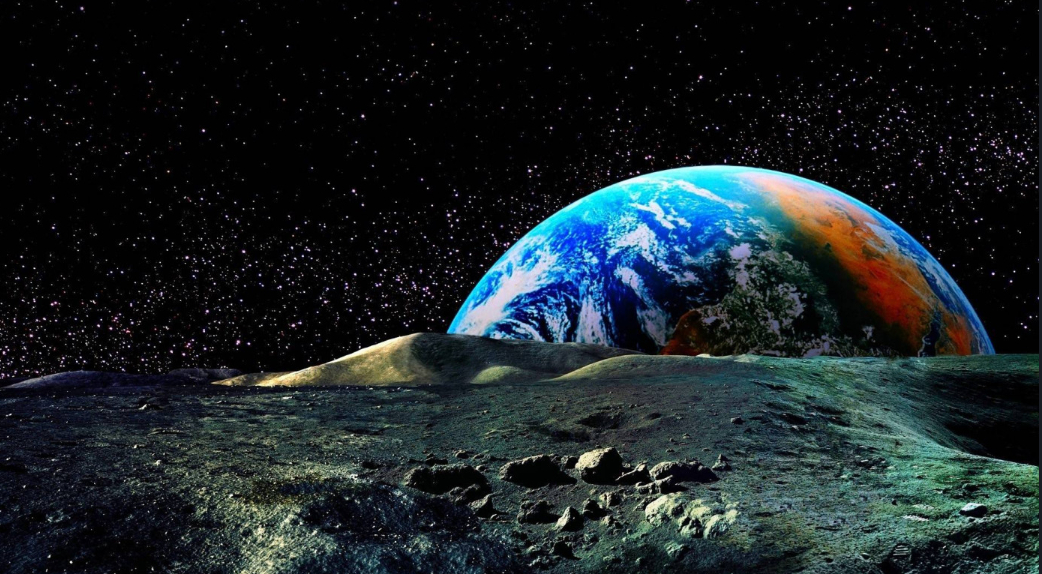

# **Introduction**

In the year 2912 the interstellar spaceship Titanic has collided with a spacetime anomaly and some of the passengers were transported to an alternate dimension. In this analysis, I will use the records recovered from the spaceship’s computer system to predict which passengers were transported.

# **Goal**

My goal is to get a score of 79 or higher on the Kaggles's Spaceship Titanic competition.

# **Dataset**

**Train file (spaceship_titanic_train.csv)** — Contains personal records of the passengers that would be used to build the machine learning model.

**Test file (spaceship_titanic_test.csv)** — Contains personal records for the remaining passengers, but not the target variable. It will be used to see how well our model performs on unseen data.

**Sample Submission File (sample_submission.csv)** — Contains the format to submit predictions.

# **Technical Requirements**

1. Exploratory data analysis
2. Pre-Processing of the data
3. Application of various machine learning models to predict which passengers were transported
4. Clear explanations of findings
5. Final conclusions
6. Suggestions on how the analysis can be improved

# **Standards**

> **Standard 1:** My standard for an acceptable accuracy score is approximately 79%. <BR>
> **Standard 2:** My standard for colinnearity is a Pearson correlation coefficient of approximately 80%. <BR>    

# **Biases**

The main bias as I can see it is caused by missing data. Every feature except the PassengerId has over 2% missing data. I tried various imputing techniques to address this issue.

# **Domain Knowledge**

I have no experience with space travel or alternate dimensions. I may have overlooked parts of the data that may have been most important and I may have given importance to parts that may have had little significance. 

# **Libraries**

In [2]:
import pandas as pd

import functions
import importlib
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Project\\functions.py'>

# **Load Data**

In [3]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\Data\test.csv",
    index_col=False
)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **Overview**

## **Dataset Features**

1. **PassengerId:** A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet:** The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep:** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin:** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination:** The planet the passenger will be debarking to.
6. **Age:** The age of the passenger.
7. **VIP:** Whether the passenger has paid for special VIP service during the voyage
8. **RoomService:** Amount the passenger has billed for Room Service.
9. **FoodCourt:** Amount the passenger has billed for Food Court.
10. **ShoppingMall:**: Amount the passenger has billed for Shopping Mall.
11. **Spa:**: Amount the passenger has billed for Spa.
12. **VRDeck:**: Amount the passenger has billed for VRDeck.
13. **Name**: The first and last names of the passenger.
13. **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## **Number of Rows and Column**

In [4]:
print('Train Set Shape:', train.shape)
print('Test Set Shape:', test.shape)

Train Set Shape: (8693, 14)
Test Set Shape: (4277, 13)


### **Insights**

> * **Train Dataset** — There are approximately 8700 rows and 14 columns. The final column is "Transported" which indicates if the passenger was transported to an alternate dimension. 
> * **Test Dataset** — There are approximately 4300 rows and 13 columns. The "Transported" column has been deleted.

## **Data Types**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### **Insights**

> * **Categorical variables (object)** — The categorical variables in the training dataset are: PassengerId, HomePlanet, Cabin, Destination, and Name.
> * **Float variable (float64)** — The Numerical variables in our train dataset: Age, RoomService, FoodCourt, ShoppingMall, Spa and VRDeck.
> * **Boolean variables (bool)** — The Boolean Variable in our dataset are CryoSleep, VIP and Transported.

## **Numerical Features**

In [83]:
train.describe(include="number").map("{:,.2f}".format)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


## **Categorical and Boolean Features**

In [6]:
functions.UniqueValues(train)

Unique Values in PassengerId: 8693
Unique Values in HomePlanet: 3
Unique Values in CryoSleep: 2
Unique Values in Cabin: 6560
Unique Values in Destination: 3
Unique Values in VIP: 2
Unique Values in Name: 8473


In [9]:
print(train['HomePlanet'].unique())

['Europa' 'Earth' 'Mars' nan]


In [10]:
print(train['Destination'].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [12]:
print(train['CryoSleep'].unique())

[False True nan]


In [13]:
print(train['VIP'].unique())

[False True nan]


### **Insights**

> * **HomePlanets:** Europa, Earth, Mars
> * **Destinations:** TRAPPIST-1e, PSO J318.5-22, 55 Cancri e
> * **CryoSleep:** True and False
> * **VIP:** True and False

## **Outliers**

In [85]:
functions.Outliers(train)

Age               77
RoomService     1861
FoodCourt       1823
ShoppingMall    1829
Spa             1788
VRDeck          1809
dtype: int64


### **Insights**

> * **Outliers:** 5 numerical features dealing with luxury spending contain outliers.
> * **Age:** Age has the fewest outliers.

## **Missing Values**

In [86]:
missing_values = functions.MissingValues(train)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [87]:
missing_values = functions.MissingValues(test)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


### **Insights**

> * **Percentage Overall:** Approximately 26% of Data is missing.
> * **Pecentage per Feature**: Each Feature Execpt PassengerId has over 2% Missing. 

## **Duplicate Data**

In [88]:
functions.Duplicates(train)

Duplicates: 0, (0.0%)


In [89]:
functions.Duplicates(test)

Duplicates: 0, (0.0%)


### **Insights**

> * **Number of Duplicates**: There are no duplicates in the train or test datasets.